In [29]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_style("darkgrid")
from sklearn import linear_model
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import random
import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings('ignore')

In [30]:
# Levanto los datos


def crear_anio(datos,tag):
    return datos[tag].apply (lambda x : x.year if x.month < 12 else x.year + 1)
def crear_mes(datos,tag):
    return datos[tag].apply (lambda x : x.month)

data_temperatura = pd.read_csv('../data/temperaturas_catedra/GlobalLandTemperaturesByCity.csv', parse_dates=['dt'])

data_lat_long = pd.read_csv('../data/long_lat/cities_lat_long.csv')

df = pd.merge(data_temperatura, data_lat_long, on=['City', 'Country'])


#df = df.dropna(axis=1, how='any')
#df = df.drop('iso2',1)
#df = df.drop('iso3', 1)
#df = df.drop('pop', 1)
#df = df.drop('Latitude', 1)
#df = df.drop('Longitude', 1)



In [31]:
df_testing = df

df_testing['month'] = crear_mes(df_testing, 'dt')
df_testing['year'] = crear_anio(df_testing, 'dt')


In [45]:
# Gráficos los datos

df_new = df_testing[(df_testing['lat'] < 48) & (df_testing['lat'] > 45) & (df_testing['lng'] < 140) & (df_testing['lng'] > -5)]


df_new = df_new[(df_new['month'] == 12) & (df_new['year'] == 2011)]

Venice = df_new[df_new['City'] == 'Venice']
Baicheng = df_new[df_new['City'] == 'Baicheng']
Tours = df_new[df_new['City'] == 'Tours']

grouped = df_new[(df_new['City'] != 'Venice') & (df_new['City'] != 'Baicheng') & (df_new['City'] != 'Tours')]


Venice = {
    "avg": Venice['AverageTemperature'].iloc[0],
    "lng": Venice['lng'].iloc[0]
}

Baicheng = {
    "avg": Baicheng['AverageTemperature'].iloc[0],
    "lng": Baicheng['lng'].iloc[0]
}

Tours = {
    "avg": Tours['AverageTemperature'].iloc[0],
    "lng": Tours['lng'].iloc[0]
}

grouped = grouped.groupby(['City']).min()


grouped

#grouped.head(1000)




,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Latitude,Longitude,city_ascii,lat,lng,pop,iso2,iso3,province,month,year
City,,,,,,,,,,,,,,,
Altay,2010-12-01,-17.793,0.820,China,47.42N,88.82E,Altay,47.866599,88.116626,140670.5,CN,CHN,Xinjiang Uygur,12,2011
Anda,2010-12-01,-17.757,0.665,China,45.81N,125.77E,Anda,46.399996,125.320040,181402.0,CN,CHN,Heilongjiang,12,2011
Angers,2010-12-01,1.666,0.200,France,47.42N,1.18W,Angers,47.480008,-0.530030,178329.5,FR,FRA,Pays de la Loire,12,2011
Arad,2010-12-01,-0.497,0.668,Romania,45.81N,21.92E,Arad,46.170010,21.319980,159338.0,RO,ROU,Arad,12,2011
Armavir,2010-12-01,5.182,0.306,Russia,45.81N,40.38E,Armavir,45.000391,41.130037,191813.5,RU,RUS,Krasnodar,12,2011
Astrakhan,2010-12-01,3.769,0.515,Russia,45.81N,47.31E,Astrakhan,46.348655,48.054989,493363.5,RU,RUS,Astrakhan',12,2011
Atyrau,2010-12-01,-0.136,0.414,Kazakhstan,47.42N,50.92E,Atyrau,47.112691,51.920024,170583.0,KZ,KAZ,Atyrau,12,2011
Bacau,2010-12-01,-2.787,0.747,Romania,45.81N,26.54E,Bacau,46.578435,26.919638,185532.0,RO,ROU,Bacau,12,2011
Balti,2010-12-01,-3.368,0.523,Moldova,47.42N,27.24E,Balti,47.759086,27.905314,135022.5,MD,MDA,Balti,12,2011


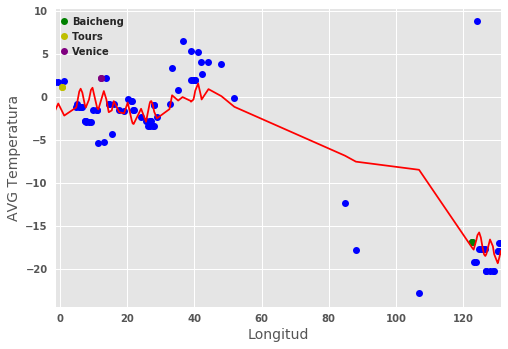

In [66]:
# Uso cuadrados mínimos para predecir
sns.tsplot(data=grouped['AverageTemperature'], time=grouped['lng'], interpolate=False, color='b')


#Santiago_legend = mpatches.Patch(color='red', label='The red data')
#plt.legend(handles=[Santiago_legend])

#plt.plot([3,2,1], label="test2")
# Place a legend to the right of this smaller subplot.

font = {'family': 'normal', 'weight': 'bold', 'size': 20}

sns.plt.rc('font', **font)

sns.plt.rc('axes', labelsize=14)


sns.plt.plot((Baicheng['lng'], Baicheng['lng']), (Baicheng['avg'], Baicheng['avg']), 'b-o', label= 'Baicheng', marker='o', color='g')
sns.plt.plot((Tours['lng'], Tours['lng']), (Tours['avg'], Tours['avg']), 'b-o', label= 'Tours', marker='o' , color='y')
sns.plt.plot((Venice['lng'], Venice['lng']), (Venice['avg'], Venice['avg']), 'b-o', label= 'Venice', marker='o', color='purple')

plt.legend(loc='best', numpoints=1, handlelength=0)

#plt.title('Promedio de temperaturas de diciembre en distintas longitudes')

def armar_matriz_A(s):
    temp = []
    for t in s:
        temp.append([t**3, t, 1, np.sin(0.8*t)*np.cos(t)])
    return np.array(temp)

def entrenar_y_predecir_en_rangos(df, min_rango_entrenamiento, max_rango_entrenamiento):
    regr = linear_model.LinearRegression(fit_intercept=False)
    
    
    # Entreno el modelo
    df_e = df[(df['lng'] <= max_rango_entrenamiento) & (df['lat'] >= min_rango_entrenamiento)]
    A_e = armar_matriz_A(df_e['lng'])
    regr.fit(A_e, df_e['AverageTemperature'])

    # Me fijo la aproximación que se realizó
    df_e['p'] = regr.predict(A_e)
    df_e['Longitud'] = df_e['lng']
    sns.tsplot(time=df_e['Longitud'], data=df_e['p'], color='r')
    return 1

def predecir(k):
    return entrenar_y_predecir_en_rangos(grouped, k-100, k+100)
    
plt.ylabel('AVG Temperatura')
ECM = predecir(50)
sns.plt.show()












# Y si no es una seria de tiempo? 

In [12]:
# Un par de cosas más de pandas

years = [2004]*6 + [2005]*6 + [2006]*6
delays = list(np.random.randn(6)+80) + list(np.random.randn(6)+5) + list(np.random.randn(6)+50)
delays[2] = 5
delays[7] = 80

df1 = pd.DataFrame({
    'year': years,
    'delay': delays
})

df1

,delay,year
0,80.821911,2004
1,81.994264,2004
2,5.000000,2004
3,77.742141,2004
4,80.080482,2004
5,80.356484,2004
6,4.082986,2005
7,80.000000,2005
8,5.537343,2005
9,5.836535,2005


In [13]:
# Groupby y sacar outliers

mascara = df1.groupby('year')['delay'].apply(mascara_outliers)
df1 = df1[mascara]
df1

,delay,year
0,80.821911,2004
1,81.994264,2004
3,77.742141,2004
4,80.080482,2004
5,80.356484,2004
6,4.082986,2005
8,5.537343,2005
9,5.836535,2005
10,5.402303,2005
11,5.086106,2005


In [14]:
# Groupby y calcular promedio

promedio = df1.groupby('year').aggregate(['mean', 'std', 'count'])
promedio

delay                
           mean       std count
year                           
2004  80.199056  1.556117     5
2005   5.189055  0.674536     5
2006  50.300613  0.755552     6